<h1><center>Restaurant Rating Prediction</center></h1>

<p><center>Predicting the aggregate <b>rating</b> of Zomato restaurants using <b>Machine Learning</b>.</center></p>

<p><center>Tools used: Python (<b>Numpy, Pandas, Matplotlib, Seaborn, Scikit-learn, Dython</b>)</center></p>

<p><center>Sections:</center></p> 
    <p><center><li><b>Data Analysis and Cleaning</b></li> 
    <li><b>Feature Engineering and Preprocessing</b></li>
    <li><b>Model building and Tuning</b></li></center></p>

First, we import the libraries that we will be using:

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from dython import nominal
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import HTML    # To centralize the plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Importing the data:

In [34]:
df = pd.read_csv('zomato.csv', encoding='ISO-8859-1') # Specifying the encoding is important or it will raise UTF error

## Data Analysis and Cleaning

---

Let's get to know our data:

In [35]:
df.shape

(9551, 21)

So we have **9551 rows** and **21 columns**.

Let's see the columns:

In [36]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

Let's take a look at the first 5 rows of the dataset, to get an idea of the data:

In [37]:
pd.set_option('display.max_columns',21)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Let's take a closer look at the columns:

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

**Observation:** It seems ```Cuisines``` has some null values. We'll take a look at that.

---

In [39]:
df.describe() # Looking at just the numerical columns

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


Looks like no restaurant has full 5 star rating. Interesting.

Now let's take a look at the **null** values of our columns:

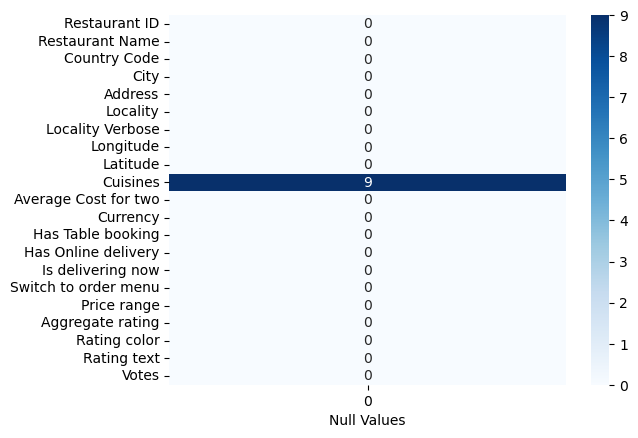

In [40]:
sns.heatmap(df.isnull().sum().values.reshape(-1,1), \
            annot=True, cmap=plt.cm.Blues, yticklabels=df.columns)
plt.xlabel('Null Values')
plt.show()

**Observation:** ```Cuisines``` has 9 null values.

Since we can't determince what cuisines a restaurant has from the other features in the dataset, we will just drop these null values.

In [41]:
df.dropna(inplace=True)

There. Let's take a look at the null counts again, just to check:

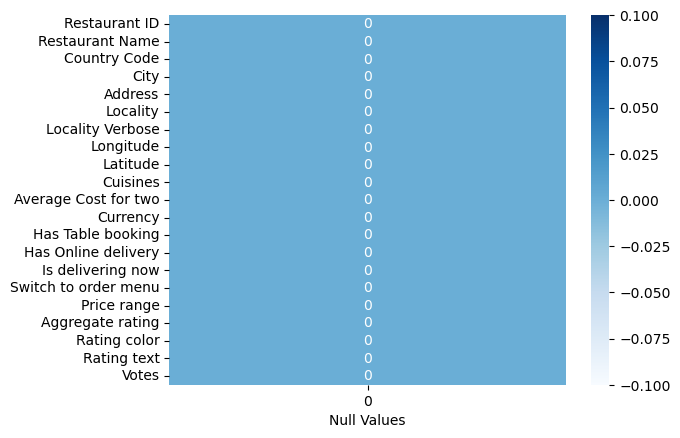

In [42]:
sns.heatmap(df.isnull().sum().values.reshape(-1,1), \
            annot=True, cmap=plt.cm.Blues, yticklabels=df.columns)
plt.xlabel('Null Values')
plt.show()

Perfect.

---

There is something interesting about the ```Switch to order menu``` column:

In [43]:
df['Switch to order menu']

0       No
1       No
2       No
3       No
4       No
        ..
9546    No
9547    No
9548    No
9549    No
9550    No
Name: Switch to order menu, Length: 9542, dtype: object

In [44]:
df['Switch to order menu'].value_counts()

No    9542
Name: Switch to order menu, dtype: int64

**Observation:** ```Switch to order menu``` has no other value than **'No'**.

Since that is not much use for us, we are going to drop it.

In [45]:
df.drop('Switch to order menu', axis=1, inplace = True)

---

Since once of the categorical columns turned out to be useless for us, it makes sense to also take a look at the rest of them:

In [46]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [47]:
df['Restaurant Name'].value_counts()

Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
The Town House Cafe          1
The G.T. Road                1
The Darzi Bar & Kitchen      1
Smoke On Water               1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7437, dtype: int64

In [48]:
df.Locality.value_counts().value_counts() # Remember, we can specify a column both as df['column'] and df.column

1      550
2      172
3      103
4       51
5       42
      ... 
44       1
45       1
50       1
51       1
122      1
Name: Locality, Length: 82, dtype: int64

In [49]:
df['Has Table booking'].value_counts()

No     8384
Yes    1158
Name: Has Table booking, dtype: int64

In [50]:
df['Has Online delivery'].value_counts()

No     7091
Yes    2451
Name: Has Online delivery, dtype: int64

In [51]:
df['Is delivering now'].value_counts()

No     9508
Yes      34
Name: Is delivering now, dtype: int64

In [52]:
df.City.value_counts()

New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lincoln              1
Lakeview             1
Lakes Entrance       1
Inverloch            1
Panchkula            1
Name: City, Length: 140, dtype: int64

**Observation:** So, all of these columns do have more than one value. That means they could actually be useful.

---

Now we are going to use the **Dython** library to make a correlation plot of all the features. What I like about this library is that it lets you easily plot the correlation between both categorical and continuous features, something that is not easy to do with Pandas.

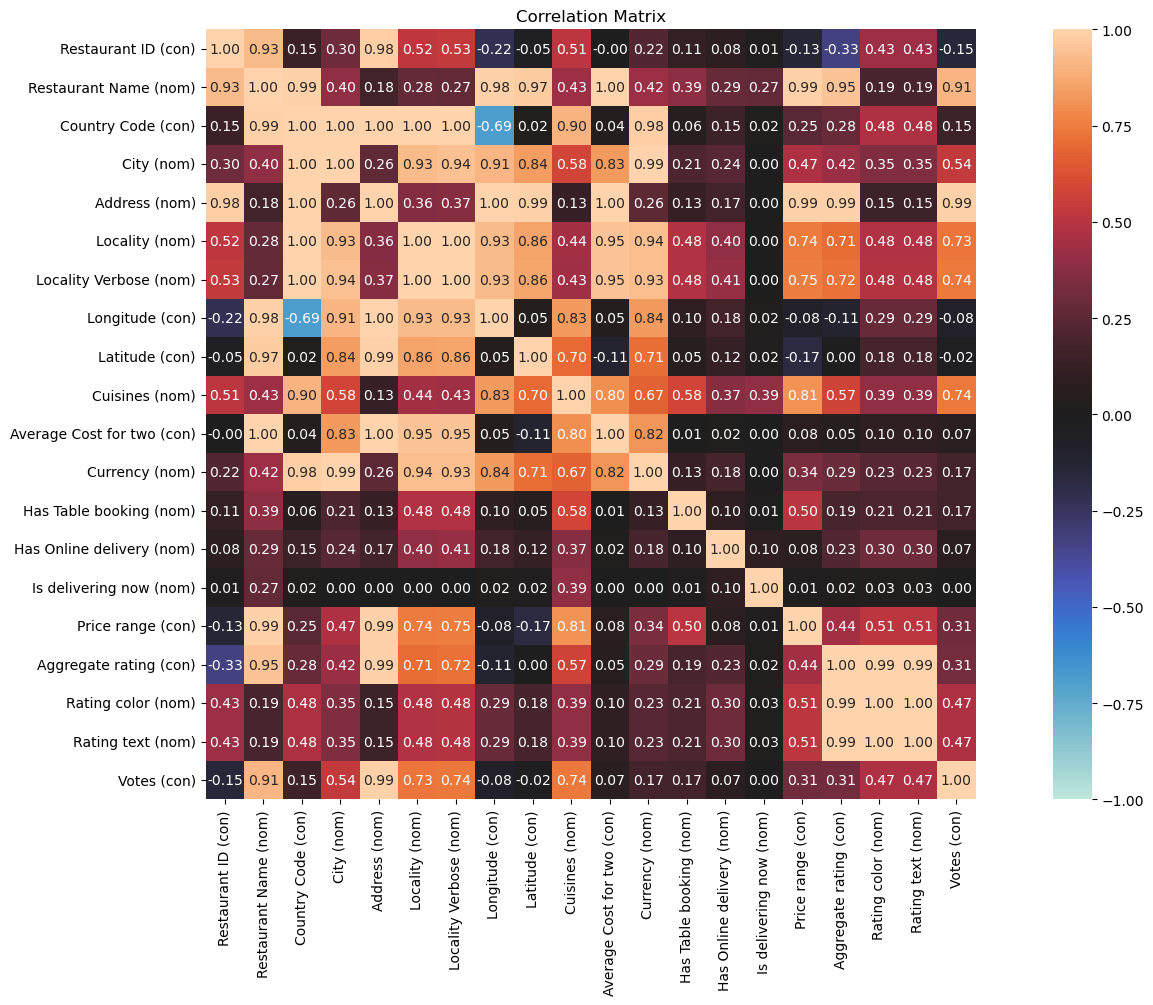

In [23]:
nominal.associations(df,figsize=(20,10),mark_columns=True,title="Correlation Matrix") # correlation matrix
plt.show()

# Feature Engineering and Preprocessing

---

If we look at the ```Aggregate rating (con)``` row, we can see how correlated it is with the rest of the features.

The first highly correlated feature is the ```Restaurant name (nom)``` column, with 95%. Let's take a look at this column and see what we can do.

In [24]:
print( f"Total number of restaurants:    {df['Restaurant Name'].value_counts().shape[0]}")
print(f"Restaurants with 1 value count: {(df['Restaurant Name'].value_counts() == 1).sum()}")

Total number of restaurants:    7437
Restaurants with 1 value count: 6703


That's a **lot** of restaurants. and a lot of them also value count of just 1. 

We won't be able to include all of these in a model. So let's just pick the top 10.

In [25]:
df['Restaurant Name'].value_counts().head(10)

Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: Restaurant Name, dtype: int64

Now we are going to define a function to get **dummies** just for these 10 restaurants. Dummies are columns with values **0** and **1**; 0 meaning false and 1 meaning true.

So, for example, if we make a dummy column for "Cafe Coffee Day", the rows in the dummy column will have 1 as the value if the restaurant's name is 'Cafe Coffee Day', and 0 if not.

In [53]:
def dummy(rest_name,column):
    df[column] = df['Restaurant Name'].apply(lambda x: 1 if str(x).strip()==rest_name\
                                             else 0)

In [54]:
dummy('Cafe Coffee Day','cafe_coffee_day')

Here is a visual example to see how the columns look:

In [55]:
df.loc[df['cafe_coffee_day']==1].head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,cafe_coffee_day
932,9650,Cafe Coffee Day,1,Faridabad,"SCF 42, Shopping Centre, Main Huda Market, Sec...",Sector 15,"Sector 15, Faridabad",77.323611,28.395267,Cafe,450,Indian Rupees(Rs.),No,No,No,1,3.3,Orange,Average,67,1
1126,8590,Cafe Coffee Day,1,Ghaziabad,"1st Floor, Shipra Mall, Gulmohar Road, Indirap...","Shipra Mall, Indirapuram","Shipra Mall, Indirapuram, Ghaziabad",77.370208,28.634047,Cafe,450,Indian Rupees(Rs.),No,No,No,1,3.2,Orange,Average,63,1
1283,631,Cafe Coffee Day,1,Gurgaon,"Upper Ground Floor, DLF Mega Mall, DLF Phase 1...","DLF Mega Mall, DLF Phase 1","DLF Mega Mall, DLF Phase 1, Gurgaon",77.093595,28.475489,Cafe,450,Indian Rupees(Rs.),No,No,No,1,2.6,Orange,Average,27,1


Wherever the ```Restaurant Name``` column's value is "Cafe Coffee Day", the value of the ```cafe_coffee_day``` column is 1, and the value for the rest of the new columns is zero.

We will apply this function for all of the 10 most frequent restaurants:

In [56]:
def dum_col(x):
    return x.strip().lower().replace(' ','_')

def dummy(lst,column):
    for i in lst.index:
        df[dum_col(i)] = df[column].apply(lambda x: i in x)

In [57]:
restaurants = df['Restaurant Name'].value_counts().head(10)
dummy(restaurants,'Restaurant Name')

In [58]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,cafe_coffee_day,domino's_pizza,subway,green_chick_chop,mcdonald's,keventers,pizza_hut,giani,baskin_robbins,barbeque_nation
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,False,False,False,False,False,False,False,False,False,False
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,False,False,False,False,False,False,False,False,False,False
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,False,False,False,False,False,False,False,False,False,False
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,False,False,False,False,False,False,False,False,False,False
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,False,False,False,False,False,False,False,False,False,False


Now we have **True** or **False** values for each of the top 10 restaurants. In python, True and False can also be written as **1** and **0**.

Let's take a look at how many restaurants are named 'Cafe Coffee Day', using our new column:

In [109]:
print(f"Number of Cafe Coffee Day's: {df.loc[df['cafe_coffee_day']==1].size}")

Number of Cafe Coffee Day's: 2730


In [111]:
df.shape

(9542, 30)

**Observation:** So out of our **9542** different restaurants, **2730** are Cafe Coffee Day's.

---

Now let's take a look at the correlation between the ```Aggregate rating``` and the new columns that we have created.

In [112]:
features = ['Price range','Votes','Country Code','Restaurant ID','Longitude',
            'Has Table booking','Has Online delivery','cafe_coffee_day',
            "domino's_pizza",'subway','green_chick_chop',"mcdonald's",'keventers',
            'pizza_hut','giani','baskin_robbins','barbeque_nation',
            'Aggregate rating']# --> Only added to see correlation, must be removed later

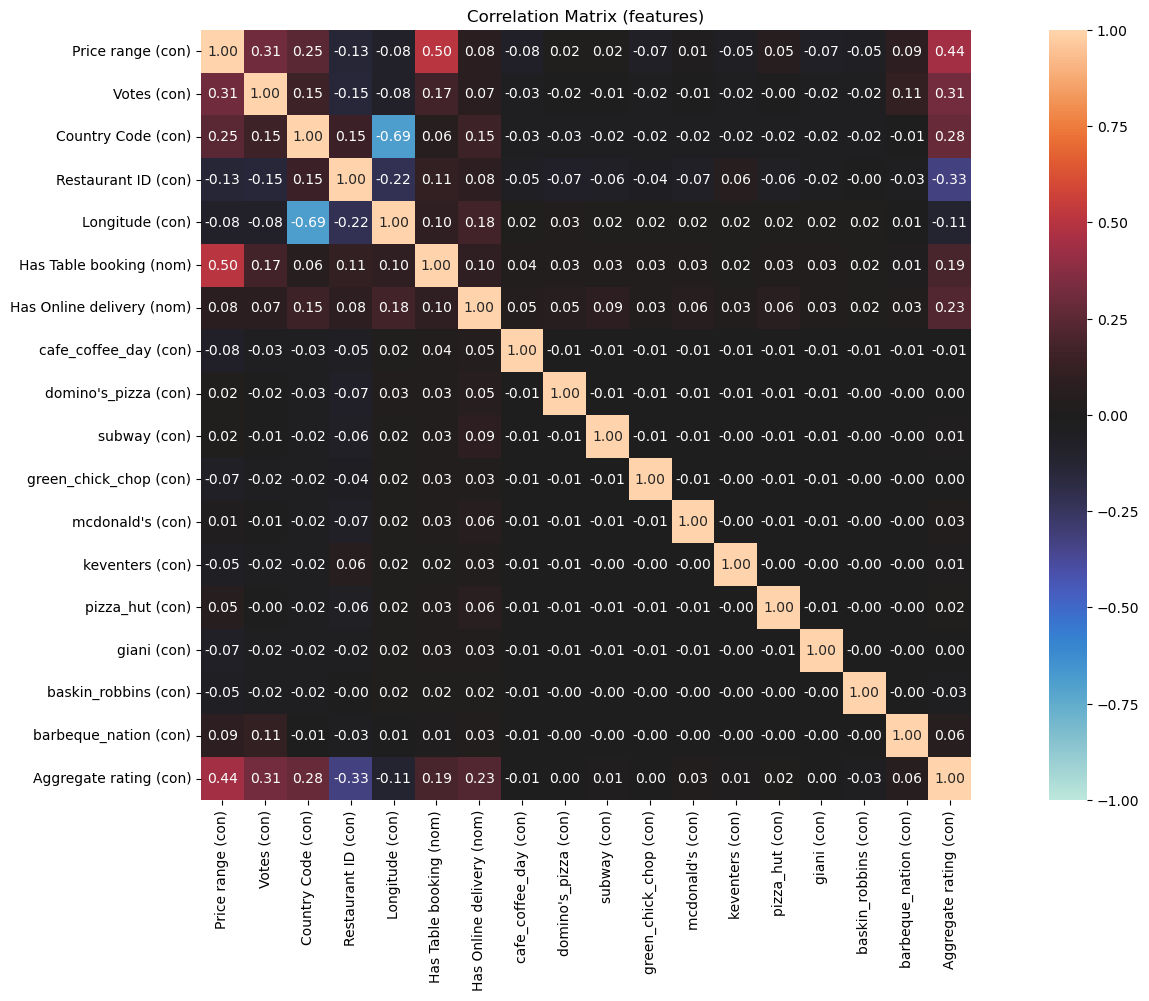

In [63]:
nominal.associations(df[features],figsize=(20,10),mark_columns=True,\
                     title="Correlation Matrix (features)")
plt.show()

**Observation:** Except for ```barbeque_nation```, the rest of the created features seem to have extremely low correlations.

Since the best practice is to keep the model simplistic and use only the best features, we are going to drop all the features except for this one.

In [64]:
features = ['Price range','Votes','Country Code','Restaurant ID','Longitude',
            'Has Table booking','Has Online delivery','barbeque_nation']

This is going to be our final list of features for training and testing our model.

**Important Note:** **We are not going to include the features ```Rating color``` and ```Rating text``` in this list. Their inclusion will not result in an actually useful model.**

# Model Building and Tuning

---

## Building

We know that predicting the ```Aggregate rating``` feature is a **regression** problem. Since its correlation with other features is not high enough, a linear model like **Linear Regression** will **not** be optimal.

Instead, we are going to use a **Random Forest Regressor** model for this problem.

First, we are going to split the data into **independent variables** **(Features)** and a **dependent variable** **(Target)**.

So, our features (the columns we will use to predict):

In [65]:
X = pd.get_dummies(df[features])
X

,Price range,Votes,Country Code,Restaurant ID,Longitude,barbeque_nation,Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes
0,3,314,162,6317637,121.027535,False,0,1,1,0
1,3,591,162,6304287,121.014101,False,0,1,1,0
2,4,270,162,6300002,121.056831,False,0,1,1,0
3,4,365,162,6318506,121.056475,False,1,0,1,0
4,4,229,162,6314302,121.057508,False,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9546,3,788,208,5915730,28.977392,False,1,0,1,0
9547,3,1034,208,5908749,29.041297,False,1,0,1,0
9548,4,661,208,5915807,29.034640,False,1,0,1,0
9549,4,901,208,5916112,29.036019,False,1,0,1,0


Our target (the column we want to predict):

In [66]:
y = df['Aggregate rating']

Now, we want to split them into **train** and **test** sets. 

We will use the train set to train the model, and the test set to test the performance of the model.

In [67]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

Next, we will import the model that we want to use, i.e, RandomForestRegressor:

In [68]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 2)

Now we **fit** the **train** sets into the model, and use it to predict the test set:

In [69]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

And check its **performance** using the **test** and the **prediction** sets:

In [82]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test,y_pred,squared=False)
mae = metrics.mean_absolute_error(y_test, y_pred)
medae = metrics.median_absolute_error(y_test, y_pred)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Median Absolute Error (MEDAE): {medae}")
print(f'Test variance: {np.var(y_test)}')

Mean Squared Error (MSE): 0.08397072865374543
Root Mean Squared Error (RMSE): 0.28977703265397936
Mean Absolute Error (MAE): 0.18649607124148773
Median Absolute Error (MEDAE): 0.11999999999999966
Test variance: 2.2502005690560023


Let's plot the **residuals**:

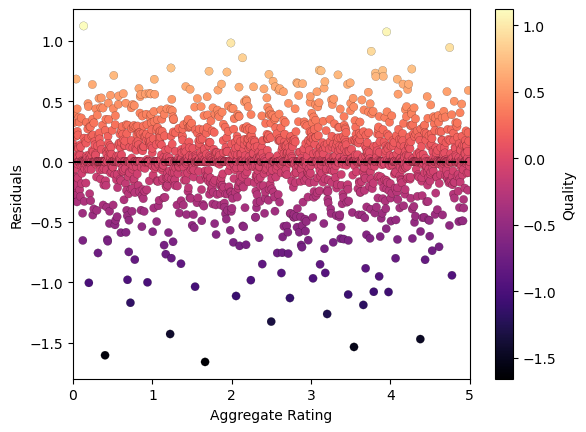

In [107]:
residuals = y_test - y_pred
# plot the residuals
plt.scatter(np.linspace(0,5,1909), residuals,c=residuals,cmap='magma', edgecolors='black', linewidths=.1)
plt.colorbar(label="Quality", orientation="vertical")
# plot a horizontal line at y = 0
plt.hlines(y = 0,
xmin = 0, xmax=5,
linestyle='--',colors='black')
# set xlim
plt.xlim((0, 5))
plt.xlabel('Aggregate Rating'); plt.ylabel('Residuals')
plt.show()

A **residual** is the difference between the **observed** value of the target and the **predicted** value. The closer the residual is to **0**, the **better** job our model is doing.

In [113]:
print(f"Error range: {residuals.max()-residuals.min()}")

Error range: 2.7820000000000076


So our prediction's **error** range is around **2.782**.

---

## Tuning

Now we are going to run **RandomizedSearchCV** to tune the model by improving the **hyperparameters**.

In [75]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf2 = RandomForestRegressor(random_state=2)

rf_rscv = RandomizedSearchCV(estimator=rf2, param_distributions=random_grid,\
                             n_iter = 100, cv = 3, verbose=2, random_state=2, n_jobs = -1)
rf_rscv.fit(X_train,y_train)
print(rf_rscv.best_params_)

# Output:
#      n_estimators= 1200,
#      min_samples_split= 10,
#      min_samples_leaf= 1,
#      max_depth = 30,
#      bootstrap= True,
#      random_state=2

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


A **hyperparameter** is a machine learning parameter whose value is chosen **before** a learning algorithm is trained. It has an impact on the model's performance.

Now we are going to use these hyperparameters to make a new Random Forests model, fit the data into it and then score it:

In [76]:
rf_random = RandomForestRegressor(
      n_estimators= 1200,
      min_samples_split= 10,
      min_samples_leaf= 1,
      max_depth = 30,
      max_features='sqrt',
      bootstrap= True,
      random_state=2) # Best RandomizedSearch parameters

rf_random.fit(X_train,y_train)
random_pred = rf_random.predict(X_test)

In [83]:
random_mse = metrics.mean_squared_error(y_test, random_pred)
random_rmse = metrics.mean_squared_error(y_test, random_pred, squared=False)
random_mae = metrics.mean_absolute_error(y_test, random_pred)
random_medae = metrics.median_absolute_error(y_test, random_pred)

print(f"Mean Squared Error (MSE): {random_mse}")
print(f"Root Mean Squared Error (RMSE): {random_rmse}")
print(f"Mean Absolute Error (MAE): {random_mae}")
print(f"Median Absolute Error (MEDAE): {random_medae}")
print(f'Test variance: {np.var(y_test)}')

Mean Squared Error (MSE): 0.07950896506171087
Root Mean Squared Error (RMSE): 0.2819733410478921
Mean Absolute Error (MAE): 0.18367410616812943
Median Absolute Error (MEDAE): 0.1146495007615349
Test variance: 2.2502005690560023


In [88]:
print('Improvements:')
print(f"Mean Squared Error (MSE):       {mse} => {random_mse}")
print(f"Root Mean Squared Error (RMSE): {rmse} => {random_rmse}")
print(f"Mean Absolute Error (MAE):      {mae} => {random_mae}")
print(f"Median Absolute Error (MEDAE):  {mae} => {random_medae}")
print(f'Test variance: {np.var(y_test)}')

Improvements:
Mean Squared Error (MSE):       0.08397072865374543 => 0.07950896506171087
Root Mean Squared Error (RMSE): 0.28977703265397936 => 0.2819733410478921
Mean Absolute Error (MAE):      0.18649607124148773 => 0.18367410616812943
Median Absolute Error (MEDAE):  0.18649607124148773 => 0.1146495007615349
Test variance: 2.2502005690560023


There is decrease in the model's errors.

We can also run **GridSearchCV** on the parameters around these to maybe tune the model further. But we are done with model tuning for this project.

---

Let's plot the residuals for this final model:

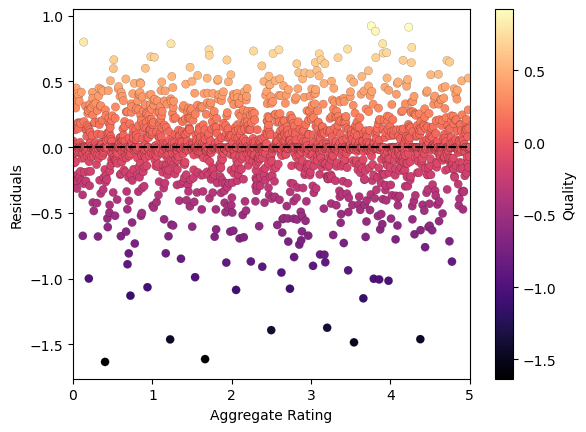

In [108]:
f_residuals = y_test - random_pred
# plot the residuals
plt.scatter(np.linspace(0,5,1909), f_residuals, c = f_residuals, cmap='magma', edgecolors='black', linewidths=.1)
plt.colorbar(label = "Quality", orientation = "vertical")
# plot a horizontal line at y = 0
plt.hlines(y = 0, xmin = 0, xmax = 5, linestyle = '--', colors = 'black')
# set xlim
plt.xlim((0, 5))
plt.xlabel('Aggregate Rating'); plt.ylabel('Residuals')
plt.show()

In [95]:
print(f"Errors range of first model: {residuals.max() - residuals.min()}")
print(f"Errors range of second model: {f_residuals.max() - f_residuals.min()}")
print(f"Error difference of models: {(residuals.max() - residuals.min()) - (f_residuals.max() - f_residuals.min())}")

Errors range of first model: 2.7820000000000076
Errors range of second model: 2.554883167428941
Error difference of models: 0.2271168325710664


When compared to the previous model (with **default** hyperparameters), our final model has a **22.7%** reduction in range of error.

<h1><center>FIN</center></h1>